Business Scenario
https://drive.google.com/file/d/103xG66z_F8-0Nq5K_ptPKVy_aFNivLI-/view?usp=sharing

A retail bank runs marketing campaigns to sell term deposit plans to customers.
 Calling every customer is expensive and inefficient.
The bank wants a rule-based system that can decide:
“Should we contact this customer or not?”
Management prefers a model whose decisions can be:
-Clearly explained 
-Converted into if–else rules 
-Understood by non-technical staff


In [100]:
import pandas as pd
import numpy as np

In [101]:
data=pd.read_csv("D:\\3YR\\TEKWORKS\\Jan-7,8\\bank_marketing_dataset.csv")
bmd=pd.DataFrame(data)

In [102]:
bmd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [103]:
bmd.isnull().sum().sum()

np.int64(0)

In [104]:
bmd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Tasks

1. Load the dataset and understand customer attributes such as:
-Age
-Job
-Balance
-Loan status
-Contact history
2. Identify input features that may influence whether a customer subscribes to a
term deposit.
3. Build a model that can classify customers into:
-Likely to subscribe
-Not likely to subscribe
4. Train the model using historical customer data.
5. Predict the outcome for unseen customer records.
6. Evaluate the model's performance using suitable classification metrics.
7. Visualize the decision-making logic of the model.

In [105]:
bmd = bmd[["age", "job", "balance", "loan", "contact","deposit"]]
bmd.head()

,age,job,balance,loan,contact,deposit
0,59,admin.,2343,no,unknown,yes
1,56,admin.,45,no,unknown,yes
2,41,technician,1270,no,unknown,yes
3,55,services,2476,no,unknown,yes
4,54,admin.,184,no,unknown,yes


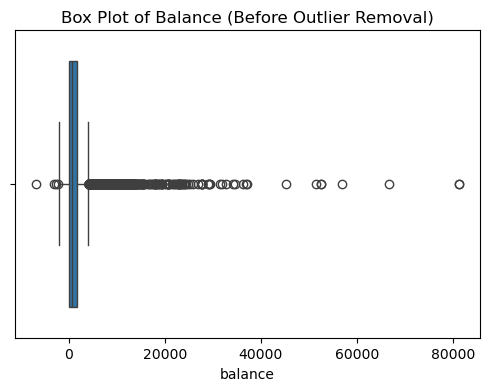

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=bmd['balance'])
plt.title("Box Plot of Balance (Before Outlier Removal)")
plt.show()

In [107]:
Q1 = bmd['balance'].quantile(0.25)
Q3 = bmd['balance'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

bmd = bmd[(bmd['balance'] >= lower_limit) & (bmd['balance'] <= upper_limit)]

In [108]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'age' column
Q1 = bmd['age'].quantile(0.25)
Q3 = bmd['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = bmd[(bmd['age'] < lower_bound) | (bmd['age'] > upper_bound)]
bmd.drop(outliers.index, inplace=True)

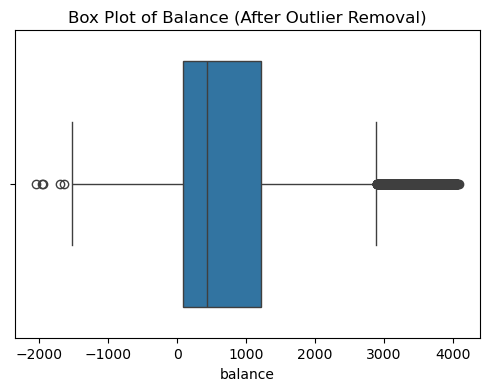

In [109]:
plt.figure(figsize=(6,4))
sns.boxplot(x=bmd['balance'])
plt.title("Box Plot of Balance (After Outlier Removal)")
plt.show()

In [110]:
bmd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9932 entries, 0 to 11161
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      9932 non-null   int64 
 1   job      9932 non-null   object
 2   balance  9932 non-null   int64 
 3   loan     9932 non-null   object
 4   contact  9932 non-null   object
 5   deposit  9932 non-null   object
dtypes: int64(2), object(4)
memory usage: 543.2+ KB


In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bmd['loan'] = le.fit_transform(bmd['loan'])
bmd['deposit'] = le.fit_transform(bmd['deposit'])

In [112]:
bmd = pd.get_dummies(bmd, columns=['job', 'contact'], drop_first=True)

In [113]:
y = bmd['deposit']
X = bmd.drop('deposit', axis=1)

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [115]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [116]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(
    criterion="gini",
    max_depth=4
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [117]:
y_pred=classifier.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.619023653749371


In [119]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[582 485]
 [272 648]]


In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1067
           1       0.57      0.70      0.63       920

    accuracy                           0.62      1987
   macro avg       0.63      0.62      0.62      1987
weighted avg       0.63      0.62      0.62      1987



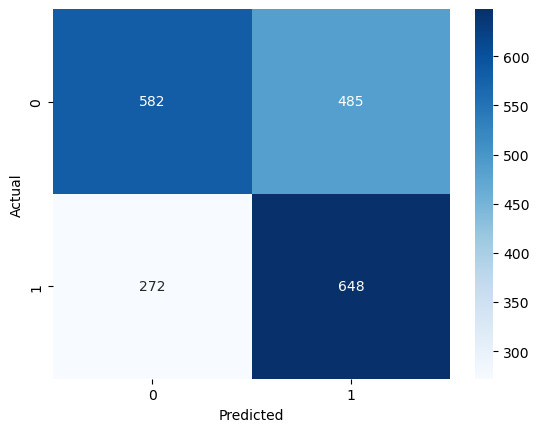

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

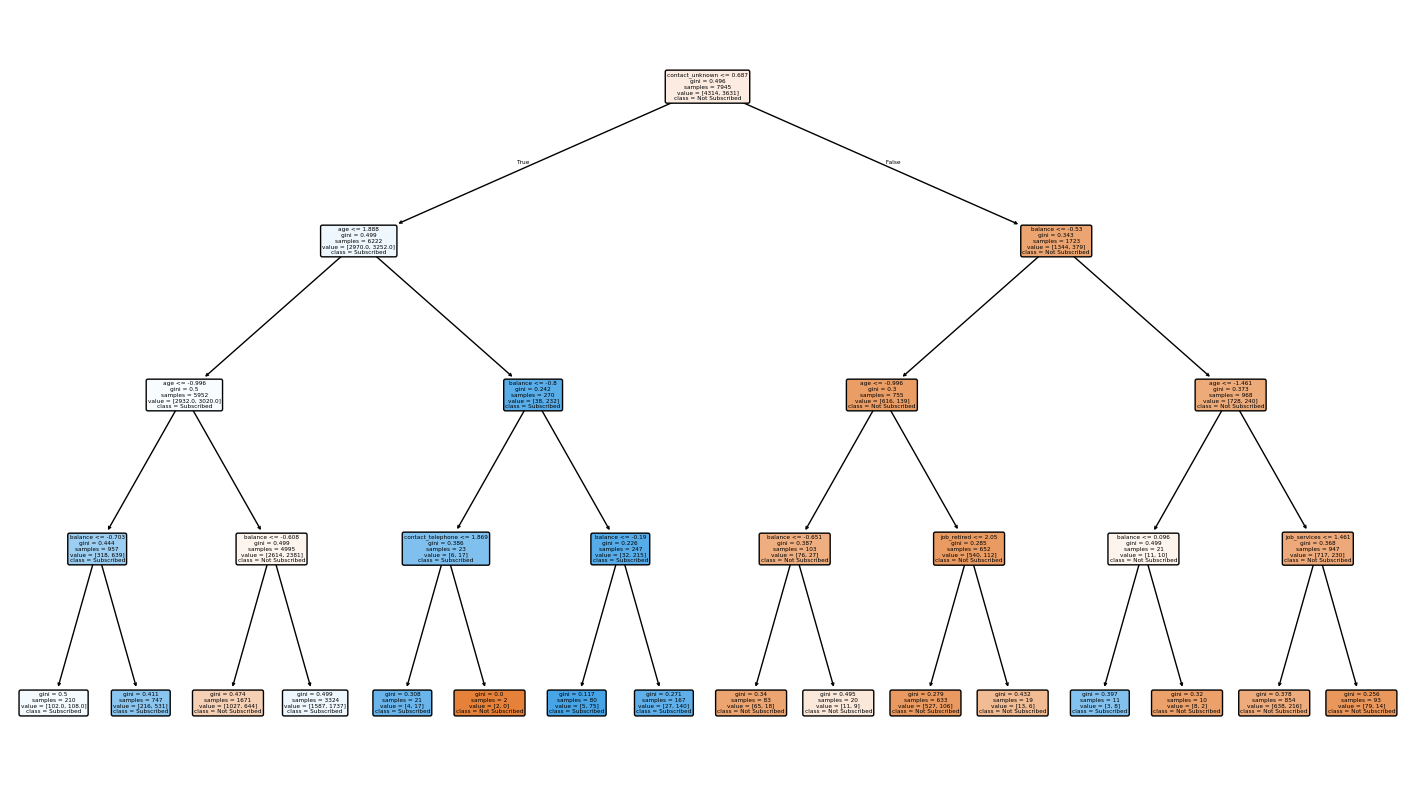

In [122]:
from sklearn. tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    classifier,
    feature_names=X.columns,
    class_names=["Not Subscribed", "Subscribed"],
    filled=True,
    rounded=True
)
plt.show()